 ### Code and data for analysing UK flight data statistics
 #### This data was taken from [kaggle](https://www.kaggle.com/ferhat00/uk-flight-stats-2018)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
flights = pd.read_csv('../data_files/uk_flight_stats/201801_Punctuality_Statistics_Full_Analysis.csv')

In [6]:
nRow, nCol = flights.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3208 rows and 25 columns


In [7]:
flights.head()

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
0,30/04/2018 13:48,201801,ABERDEEN,POLAND,GDANSK,WIZZ AIR,S,18,0,2,...,0.000000,5.000000,0.000000,0.0,0.0,10.000000,11.000000,19,63.157895,33.736842
1,30/04/2018 13:48,201801,ABERDEEN,POLAND,WARSAW (CHOPIN),WIZZ AIR,S,12,0,0,...,8.333333,0.000000,0.000000,0.0,0.0,0.000000,21.583333,18,83.333333,7.055556
2,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),FLYBE LTD,S,60,0,2,...,1.612903,0.000000,0.000000,0.0,0.0,3.225806,5.683333,62,82.258065,12.161290
3,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,FLYBE LTD,S,145,0,1,...,2.054795,0.000000,0.000000,0.0,0.0,0.684932,4.000000,176,81.818182,14.835227
4,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BRISTOL,BMI REGIONAL,S,57,0,2,...,11.864407,1.694915,1.694915,0.0,0.0,3.389831,23.403509,65,80.000000,22.384615


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208 entries, 0 to 3207
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   run_date                                            3208 non-null   object 
 1   reporting_period                                    3208 non-null   int64  
 2   reporting_airport                                   3208 non-null   object 
 3   origin_destination_country                          3208 non-null   object 
 4   origin_destination                                  3208 non-null   object 
 5   airline_name                                        3208 non-null   object 
 6   scheduled_charter                                   3208 non-null   object 
 7   number_flights_matched                              3208 non-null   int64  
 8   actual_flights_unmatched                            3208 non-null   int64  
 9

In [9]:
flights.isna().sum()

run_date                                              0
reporting_period                                      0
reporting_airport                                     0
origin_destination_country                            0
origin_destination                                    0
airline_name                                          0
scheduled_charter                                     0
number_flights_matched                                0
actual_flights_unmatched                              0
number_flights_cancelled                              0
flights_more_than_15_minutes_early_percent            0
flights_15_minutes_early_to_1_minute_early_percent    0
flights_0_to_15_minutes_late_percent                  0
flights_between_16_and_30_minutes_late_percent        0
flights_between_31_and_60_minutes_late_percent        0
flights_between_61_and_120_minutes_late_percent       0
flights_between_121_and_180_minutes_late_percent      0
flights_between_181_and_360_minutes_late_percent

#### Fortunately our dataset is clean. Now let's start analysing data

In [25]:
len(flights['origin_destination_country'].unique())

118

In [26]:
flights['origin_destination_country'].unique()

array(['POLAND', 'UNITED KINGDOM', 'DENMARK', 'FRANCE', 'GERMANY',
       'ICELAND', 'IRISH REPUBLIC', 'NETHERLANDS', 'NORWAY', 'SPAIN',
       'SPAIN(CANARY ISLANDS)', 'SWITZERLAND', 'USA', 'AUSTRIA',
       'BELGIUM', 'ITALY', 'PORTUGAL(EXCLUDING MADEIRA)', 'CUBA',
       'BULGARIA', 'LITHUANIA', 'MALTA', 'CAPE VERDE ISLANDS', 'BARBADOS',
       'JAMAICA', 'DOMINICAN REPUBLIC', 'MEXICO', 'CZECH REPUBLIC',
       'HUNGARY', 'ROMANIA', 'SLOVAK REPUBLIC', 'TURKMENISTAN',
       'THAILAND', 'INDIA', 'PAKISTAN', 'QATAR', 'UNITED ARAB EMIRATES',
       'EGYPT', 'MOROCCO', 'GAMBIA', 'CYPRUS', 'FINLAND', 'GIBRALTAR',
       'LUXEMBOURG', 'PORTUGAL(MADEIRA)', 'SWEDEN', 'TURKEY', 'Unknown',
       'GREECE', 'LATVIA', 'FAROE ISLANDS', 'CANADA', 'LEBANON',
       'ANTIGUA AND BARBUDA', 'BERMUDA', 'GRENADA', 'PUERTO RICO',
       'SAINT KITTS AND NEVIS', 'ST LUCIA', 'TRINIDAD AND TOBAGO',
       'TURKS AND CAICOS ISLANDS', 'COSTA RICA', 'RWANDA', 'ALBANIA',
       'AZERBAIJAN', 'BELARUS', 'ESTONI

#### It can be seen that in 2018 flights were carried out to 118 countires

In [38]:
flights['airline_name'].value_counts().head()

RYANAIR                        433
EASYJET AIRLINE COMPANY LTD    408
FLYBE LTD                      310
TUI AIRWAYS LTD                240
BRITISH AIRWAYS PLC            238
Name: airline_name, dtype: int64

In [27]:
flights.head(5)

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
0,30/04/2018 13:48,201801,ABERDEEN,POLAND,GDANSK,WIZZ AIR,S,18,0,2,...,0.000000,5.000000,0.000000,0.0,0.0,10.000000,11.000000,19,63.157895,33.736842
1,30/04/2018 13:48,201801,ABERDEEN,POLAND,WARSAW (CHOPIN),WIZZ AIR,S,12,0,0,...,8.333333,0.000000,0.000000,0.0,0.0,0.000000,21.583333,18,83.333333,7.055556
2,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),FLYBE LTD,S,60,0,2,...,1.612903,0.000000,0.000000,0.0,0.0,3.225806,5.683333,62,82.258065,12.161290
3,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,FLYBE LTD,S,145,0,1,...,2.054795,0.000000,0.000000,0.0,0.0,0.684932,4.000000,176,81.818182,14.835227
4,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BRISTOL,BMI REGIONAL,S,57,0,2,...,11.864407,1.694915,1.694915,0.0,0.0,3.389831,23.403509,65,80.000000,22.384615


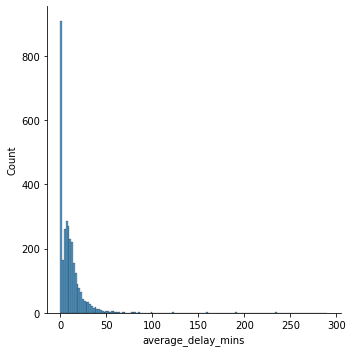

In [34]:
sns.displot(flights['average_delay_mins'])

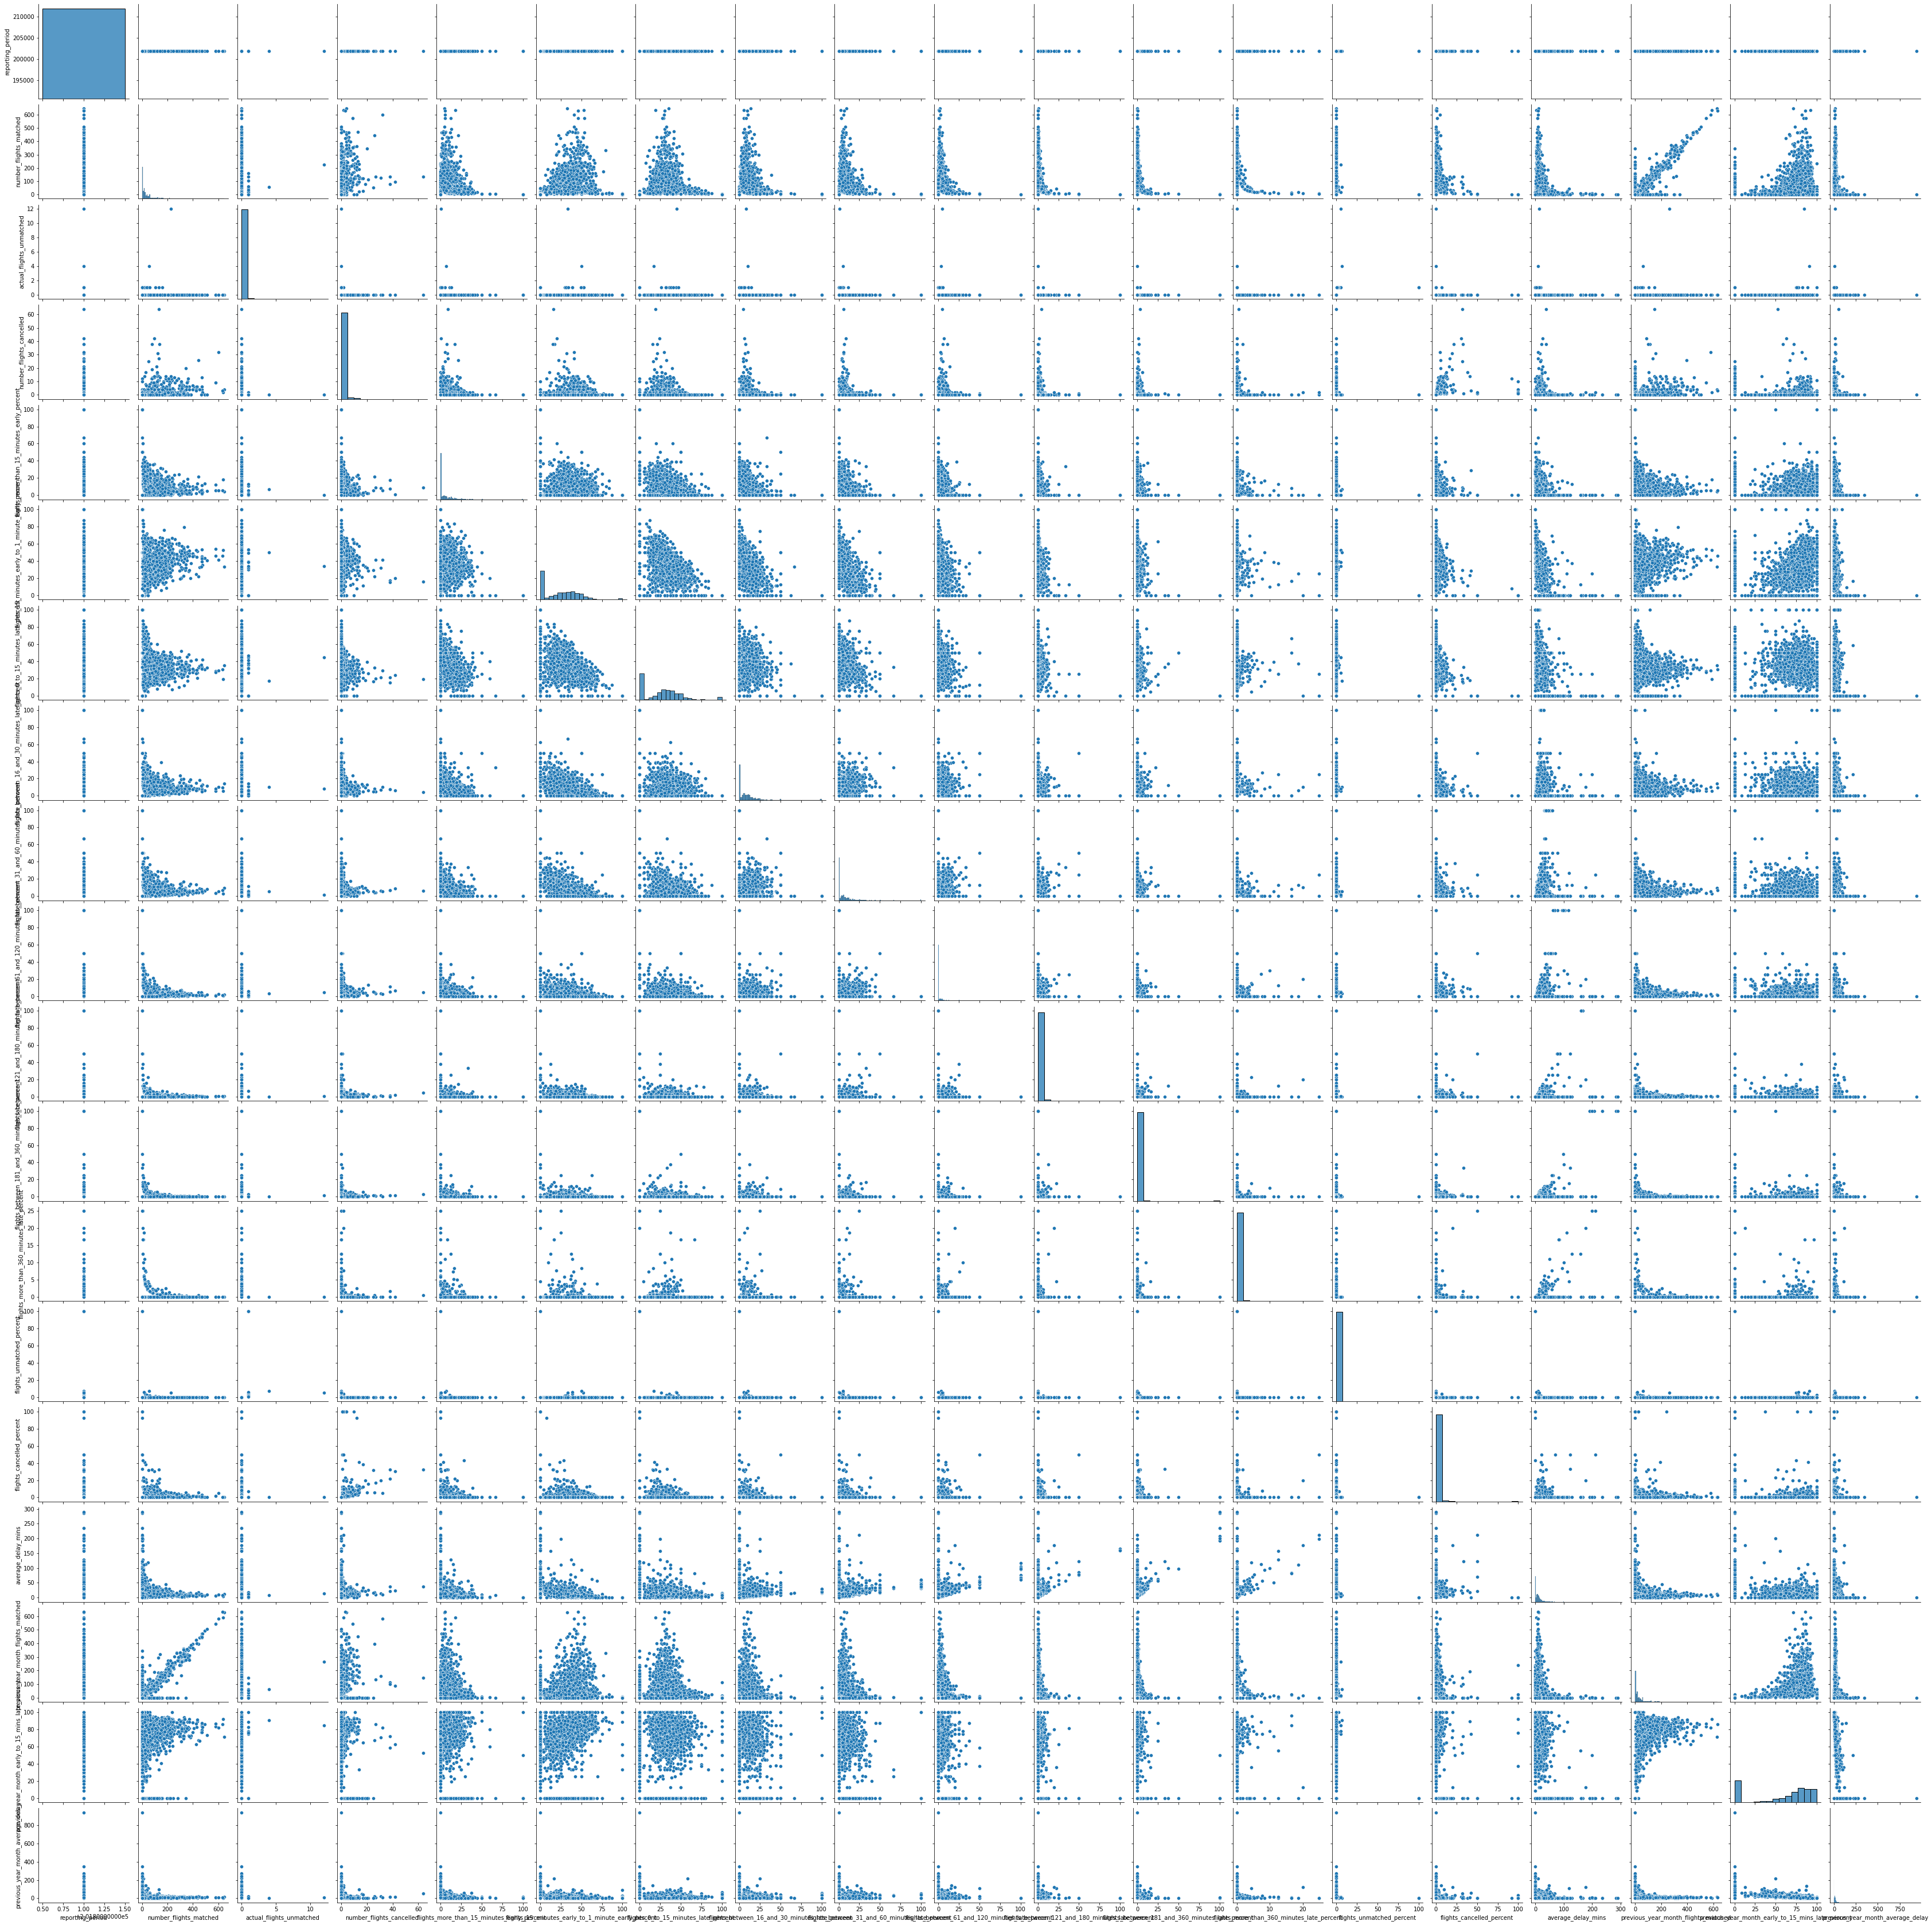

In [39]:
sns.pairplot(flights)